In [1]:
import sys
sys.path.append('../../')

import numpy as np
from qiskit import IBMQ, Aer, QuantumCircuit
import matplotlib.pyplot as plt
from main import device_process_measurement_tomography, Quantities, Cross_Quantities, measurement_process_tomography, tomographic_gate_set_tomography
from qiskit.compiler import transpile
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.aer.noise import NoiseModel
from utils_plots import *

In [2]:
IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = IBMQ.get_provider(hub='ibm-q-research-2', group='csic-1', project='main')

In [3]:
backend = provider.get_backend('ibm_perth')
simulator = Aer.get_backend('aer_simulator')
noise_model = NoiseModel.from_backend(backend)

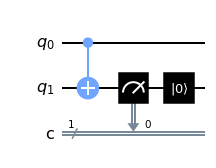

In [4]:
qc = QuantumCircuit(2,1)
qc.cx(0,1)
qc.measure(1,0)
qc.reset(1)
qc.draw(output='mpl')

In [5]:
gst = tomographic_gate_set_tomography( 2 )
mpt = measurement_process_tomography( 1, 2, 1 ) 
qcs = mpt.circuits( qc )
qcs0 = gst.circuits()
# results = simulator.run(qcs+qcs0,shots=1e3).result()
# gate_set = gst.fit( results )
# mpt.fit( results, gate_set= gst.gateset2spam(gate_set) )

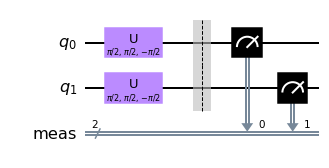

In [6]:
qcs0[12].draw(output='mpl')

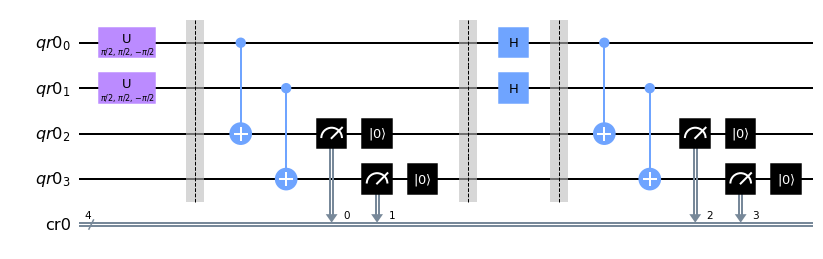

In [7]:
qcs[13].draw(output='mpl')

In [8]:
qcs_t = transpile( qcs, backend, initial_layout=[0,3,1,5] )
qcs0_t  = transpile( qcs0, backend, initial_layout=[0,3] )
qc_t = qcs_t + qcs0_t

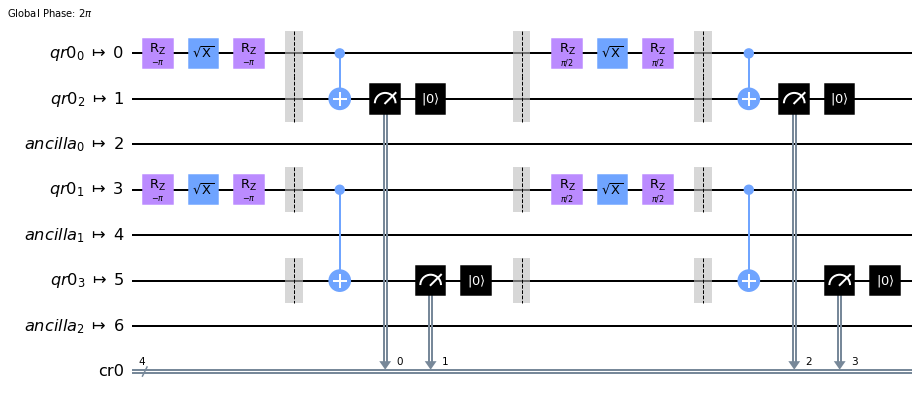

In [9]:
qcs_t[13].draw(output='mpl')

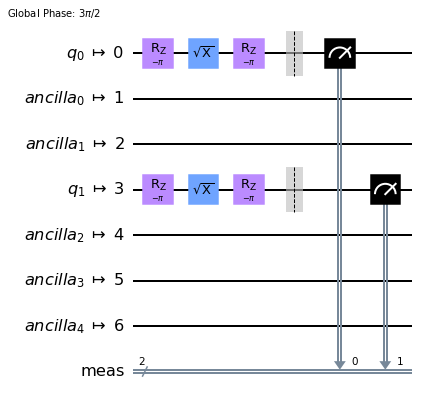

In [10]:
qcs0_t[12].draw(output='mpl')

In [12]:
# for _ in range(5):
#     job = backend.run( qc_t, shots=2**13 )
#     print( job.job_id() )

# 634759ead31ce75ef7d81771
# 634759edea97baa6ece189ef
# 634759ef68409f679d2c5ed7
# 634759f0ea97ba0acae189f0
# 634759f1d31ce767eed81772

In [13]:
jobs_id = [
        '634759ead31ce75ef7d81771',
        '634759edea97baa6ece189ef',
        '634759ef68409f679d2c5ed7',
        '634759f0ea97ba0acae189f0',
        '634759f1d31ce767eed81772']

In [14]:
results = []
for job_id in jobs_id:
    job = backend.retrieve_job(job_id)
    results.append( job.result() )

In [21]:
chois_single = []
povms_single = []
for j in range(5):
    results_gst = gst.fit( results[j] )
    gate_set = [results_gst.states, results_gst.measurements, results_gst.processes ] 
    results_mpt = mpt.fit( results[j], gate_set= gst.gateset2spam(gate_set) )
    chois_single.append( results_mpt.chois ) 
    povms_single.append( results_mpt.povms ) 

In [22]:
Quantities( np.mean(povms_single,0)[0], np.mean(chois_single,0)[0] )

(0.9650012383319899, 0.9400815116708081, 0.9720632451462564)

In [23]:
Quantities( np.mean(povms_single,0)[1], np.mean(chois_single,0)[1] )

(0.9528978353731192, 0.9066236861513176, 0.9473363842839565)

[<Axes3DSubplot:>, <Axes3DSubplot:>]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


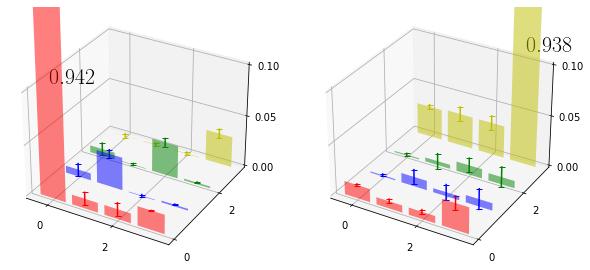

In [18]:
Plot_Chois( np.mean( chois_single, 0 )[0], np.std( chois_single, axis=0 )[0] )

[<Axes3DSubplot:>, <Axes3DSubplot:>]

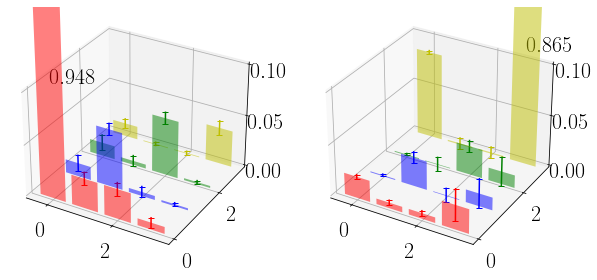

In [24]:
Plot_Chois( np.mean( chois_single, 0 )[1], np.std( chois_single, axis=0 )[1]  )